In [275]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_rows', None)

warnings.filterwarnings('ignore')

In [276]:
#Reading the Loans data file provided in the assignment
df_loans= pd.read_csv("loan.csv")
df_loans.shape

(39717, 111)

In [277]:
# Checking the dataframe is loaded correctly
df_loans.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

# Starting Data cleanup process

In [278]:
# Checking the percentage of null values present for each column in the data
df_loans.isnull().sum()/len(df_loans)*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [279]:
# There are certain columns where almost all or most of the data is missing for all the rows, hence removing
# those columns where most of the data is null
df_loans=df_loans.dropna(axis=1,thresh=27000)
df_loans.shape

(39717, 53)

In [280]:
# Checking the percentage of the missing data present after the removal of columns
df_loans.isnull().sum()/len(df_loans)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [281]:
# Checking if all the values present in the id column is unique
df_loans.id.unique().size

39717

In [282]:
# Checking all the columns now present in the dataframe
df_loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [283]:
# Checking the type for each column in the dataframe
df_loans.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [284]:
#We analyzed the data in all the columns manually and found certain columns which are not suitable for analysis, hence 
# dropping these columns,Moreover all these columns have similar values for all the rows
df_loans=df_loans.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code',
                       'collections_12_mths_ex_med','initial_list_status','url','pymnt_plan','id','member_id'],axis=1)
df_loans.shape

(39717, 41)

In [285]:
#Checking the percentage of null values after cleanup
round(df_loans.isnull().sum()/len(df_loans)*100,2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_py

In [286]:
#Check the different values for employee length
df_loans.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [287]:
# Standardizing values for the employee length
df_loans.emp_length=df_loans.emp_length.apply(lambda tenure: tenure if pd.isnull(tenure)  else str(tenure).split(" ")[0])

# Replacing less than 1 year with 0, as per the data dictioanry less than 1 can be considered as 0
df_loans.emp_length=df_loans.emp_length.apply(lambda tenure:0 if tenure=='<' else tenure)

# Replacing more than 10 years with 10, as per the data dictioanry more than 10 years can be considered as 10
df_loans.emp_length=df_loans.emp_length.apply(lambda tenure:10 if tenure=='10+' else tenure)

# Converting the data from String to integer
df_loans.emp_length=df_loans.emp_length.apply(lambda tenure: tenure if pd.isnull(tenure)  else int(tenure))

df_loans.emp_length.value_counts()

10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

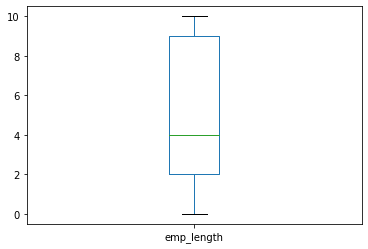

In [288]:
# Plotting the Box plot for Employee Length
df_loans.emp_length.plot.box()
plt.show()

In [289]:
# Imputing employee length where value is null with mean value
df_loans.emp_length=df_loans.emp_length.fillna(round(df_loans.emp_length.mean()))
df_loans.emp_length.value_counts()

10.0    8879
0.0     4583
2.0     4388
5.0     4357
3.0     4095
4.0     3436
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [290]:
# Checking the percentage of null values after cleanup
round(df_loans.isnull().sum()/len(df_loans)*100,2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_py

In [291]:
# Checking the different values in emp_title and removing this, the data is quite scattered and is not useful
# for our analysis
df_loans.emp_title.value_counts()


US Army                                                                           134
Bank of America                                                                   109
IBM                                                                                66
AT&T                                                                               59
Kaiser Permanente                                                                  56
Wells Fargo                                                                        54
USAF                                                                               54
UPS                                                                                53
US Air Force                                                                       52
Walmart                                                                            45
Lockheed Martin                                                                    44
State of California                                   

In [292]:
# Dropping the Employee title, as it doesnt seem to be required for our analysis
df_loans=df_loans.drop(['emp_title'],axis=1)
df_loans.shape

(39717, 40)

In [293]:
# Checking the percentage of null values after cleanup
df_loans.isnull().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                       11
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  50
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_re

In [294]:
# Since the categories are not defined correctly in the title and the values given are not of much significance
# hence removing title as well
print(df_loans.title.value_counts())
df_loans=df_loans.drop(['title'],axis=1)
print(df_loans.shape)

Debt Consolidation                                                                  2184
Debt Consolidation Loan                                                             1729
Personal Loan                                                                        659
Consolidation                                                                        517
debt consolidation                                                                   505
Home Improvement                                                                     356
Credit Card Consolidation                                                            356
Debt consolidation                                                                   334
Small Business Loan                                                                  328
Credit Card Loan                                                                     317
Personal                                                                             308
Consolidation Loan   

In [295]:
# Checking the percentage of null values after cleanup
df_loans.isnull().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  50
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_re

In [296]:
# checking the data types for all columns
df_loans.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [297]:
# Removing the percentage sign from int_rate
df_loans.int_rate=df_loans.int_rate.apply(lambda rate: float(rate.replace('%','')))
df_loans.rename(columns={'int_rate':'int_rate_percent'},inplace=True)

In [298]:
# Standardizing the values in term, and removing the months from the same
df_loans['term'] = df_loans[['term']].applymap(lambda value:str(value).rstrip('months'))
df_loans['term'] = df_loans['term'].astype('int64')
df_loans.rename(columns={'term':'term_in_months'},inplace=True)

In [299]:
# Checking the data type after the conversion triggered above
df_loans.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term_in_months               int64
int_rate_percent           float64
installment                float64
grade                       object
sub_grade                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [300]:
# Checking the shape of the dataframe
df_loans.shape

(39717, 39)

In [301]:
# Filtering the rows in the dataframe, as we need to focus on the accounts\loans where the
# loans was fully paid or defaulted. and current are the ones which were not defaulted and are in progress
df_loans = df_loans[df_loans.loan_status != 'Current']
print(df_loans.loan_status.unique())
print(df_loans.shape)

['Fully Paid' 'Charged Off']
(38577, 39)


In [302]:
# Since the Loan status will be useful for the data analysis, converting this to ordered category
# where 0 means fully paid and 1 is Charged off
df_loans['loan_status'] = df_loans['loan_status'].apply(lambda loanType: 0 if loanType=='Fully Paid' else 1)
# summarising the values
df_loans['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [303]:
# Checking if there are nay duplicate columns present in the dataframe
duplicate_rows_df = df_loans[df_loans.duplicated()]
print('Number of duplicate rows: ', duplicate_rows_df.shape)

Number of duplicate rows:  (0, 39)


In [306]:
# Checking the values in the zip code and we found that XX is appended in the zip code, 
# removing xx from the zip code values
df_loans.zip_code=df_loans.zip_code.apply(lambda zipcode: zipcode.rstrip('xx'))
df_loans.zip_code.unique()

array(['860', '309', '606', '917', '852', '280', '900', '958', '774',
       '853', '913', '245', '951', '641', '921', '067', '890', '770',
       '335', '799', '605', '103', '150', '326', '564', '141', '080',
       '974', '934', '405', '946', '445', '850', '292', '088', '180',
       '029', '700', '010', '441', '104', '061', '616', '947', '914',
       '765', '980', '017', '972', '752', '787', '077', '540', '225',
       '440', '437', '559', '912', '325', '300', '923', '352', '013',
       '146', '074', '786', '937', '331', '115', '191', '114', '908',
       '902', '750', '950', '329', '226', '992', '614', '083', '100',
       '926', '931', '712', '060', '707', '342', '604', '895', '430',
       '919', '996', '891', '935', '801', '928', '233', '927', '970',
       '211', '303', '070', '194', '263', '403', '301', '553', '993',
       '312', '432', '602', '216', '151', '971', '305', '334', '050',
       '129', '925', '483', '760', '961', '200', '085', '981', '330',
       '601', '117',

In [366]:
# Mapping zip code to a particular group, as this will help in plotting of the data against the target variable
zip_code_mapping = {0: "1-100",1: "101-200",2: "201-300",3: "301-400",4: "401-500",5: "501-600",6: "601-700",7: "701-800",
  8: "801-900",9: "900-901"}

def get_zip_code_group(zip_code):
    return zip_code_mapping[int(zip_code/100)]

df_loans['zip_code'] = df_loans['zip_code'].astype('int64')

df_loans['zip_code_range'] = df_loans[['zip_code']].applymap(lambda value : get_zip_code_group(value))

In [309]:
# There are 3 types of variable present in the data of the customer
# 1 - Demographic variables, 2 - Loan Characterstics, 3 - Customer Behaviour variables
# For the analysis purpose we need to focus on Demographic and Loan characteristics as this data is present at the
# time of the loan application
# Dropping the variables which are related to the customer behaviour
customer_behaviour_columns=['pub_rec_bankruptcies','delinq_2yrs','earliest_cr_line','inq_last_6mths',
                           'open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv',
                           'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                           'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
df_loans=df_loans.drop(customer_behaviour_columns,axis=1)
df_loans.shape

(38577, 19)

In [344]:
# As per the data dictionary, issue_d is 'The month which the loan was funded', hence stripping the year
df_loans.issue_d=df_loans.issue_d.apply(lambda date: pd.to_datetime(date,format='%b-%y'))
df_loans['issue_month']=df_loans.issue_d.apply(lambda date:date.month)
df_loans['issue_year']=df_loans.issue_d.apply(lambda date:date.year)

# Analysis of variables, Univariate and Bivariate Analysis, target variable is loan_Status

In [311]:
# Columns for the analysis
df_loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_in_months',
       'int_rate_percent', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'zip_code_group'],
      dtype='object')

In [312]:
# Checking perentage of defaulters in the given data
print("Percentage of defaulters in data:: " +str(round(df_loans['loan_status'].mean()*100,2))+"%")

Percentage of defaulters in data:: 14.59%


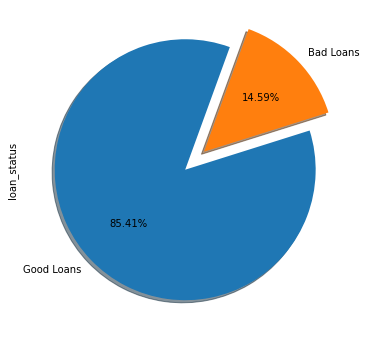

In [314]:
# Plotting distribution of Bad loans and Good loans
plt.figure(figsize=(12, 6))
labels = "Good Loans", "Bad Loans"
df_loans["loan_status"].value_counts().plot.pie(explode=[0,0.2],autopct='%1.2f%%', shadow=True, labels=labels, startangle=70)
plt.show()

In [315]:
# Creating a function to create the plot based on the given parameter with our target variable i,e loan_status 
def plot_data(data1,data2):
    plt.figure(figsize=(15, 8))
    plot=sns.barplot(x=data1, y=data2, data=df_loans)
    plot.set(ylabel='Loan Defaults')
    plt.show()

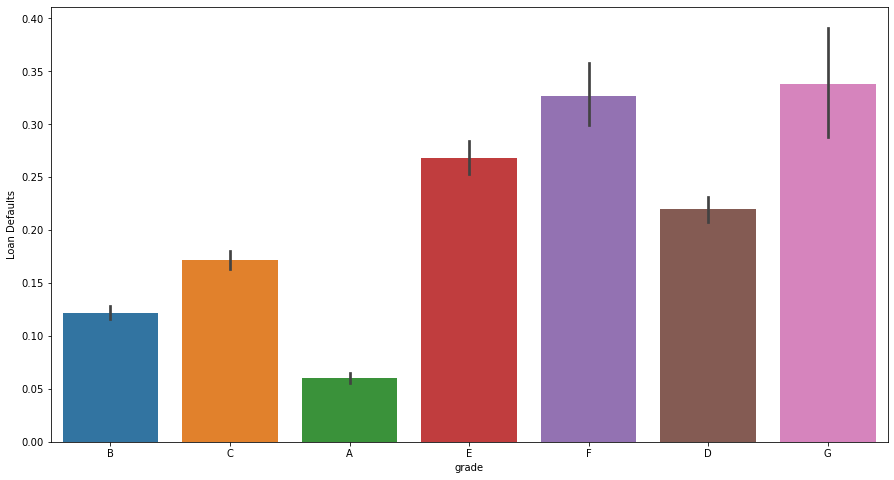

In [316]:
# Checking the Default loans against the different grades
plot_data('grade','loan_status')

### Observation 1:
#### Above data suggests that as the grade is changing from A to G, the percentage of defaulters are also increasing, the maximum defaulters are from grade 'G'

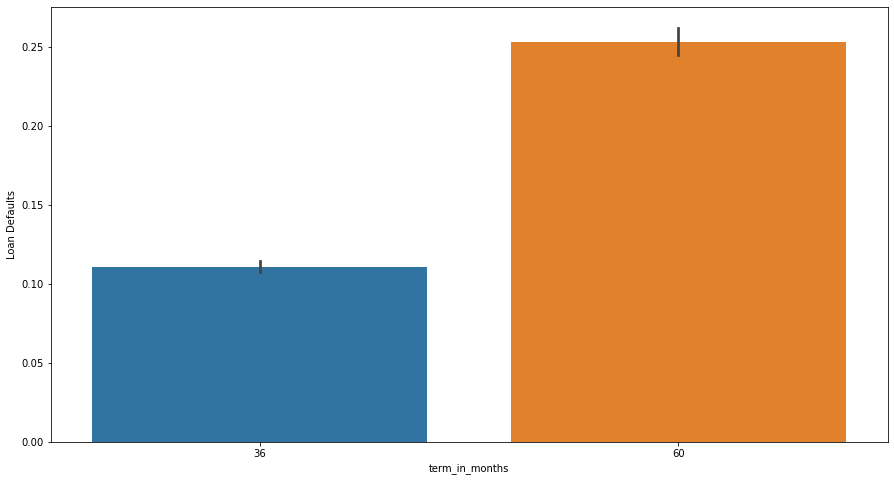

In [317]:
# Checking the Default loans against the term
plot_data('term_in_months','loan_status')

### Observation 2:
#### Above suggests that more the term of the loan, the percentage of defaults also increases 

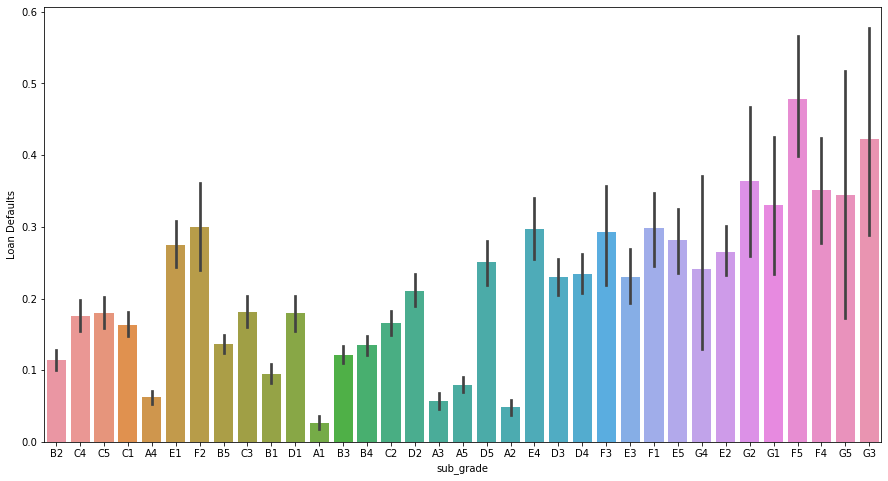

In [318]:
# Checking the sub grade against the target variable
plot_data('sub_grade','loan_status')

###  Observation 3:
#### Above suggests that for different sub grades, F5 is the sub grade having more percentage of defaults, followed by G3

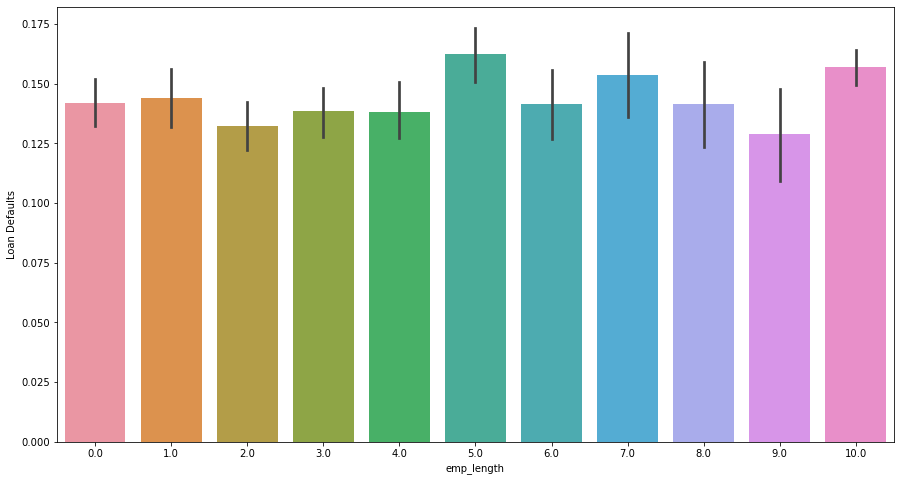

In [319]:
# Checking the Employee length against the target variable
plot_data('emp_length','loan_status')

### Observation 4
#### This suggests that the percentage of defaults across each employment length is almost same and this doesnt impact the loan defaults

In [320]:
# Checking the loan defaulters across different loan amounts
bins = [0, 5000, 10000, 15000, 20000,25000,30000,35000]
labels = [f'{i}+' if j==np.inf else f'{i}-{j}' for i, j in zip(bins, bins[1:])]

df_loans['loan_range'] = pd.cut(df_loans['loan_amnt'], bins, labels)
df_loans.groupby('loan_range')['loan_status'].sum()

loan_range
(0, 5000]         1314
(5000, 10000]     1642
(10000, 15000]    1055
(15000, 20000]     751
(20000, 25000]     542
(25000, 30000]     143
(30000, 35000]     180
Name: loan_status, dtype: int64

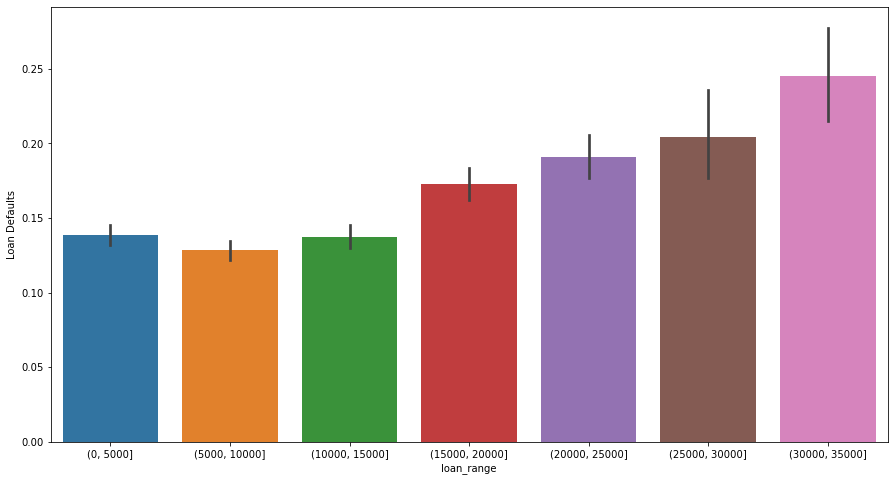

In [321]:
# Plotting the graph to see the number of defaults across different Loan amounts
plot_data('loan_range','loan_status')

### Observation5:
#### This suggests that as the amount of the loan requested is increasing the number of defaults are also incresing and more number of defaults are there in the loan amount range of 30000-35000

In [322]:
# Binning the values for the interst rate 
bins = [5, 9, 13, 17, 21,25]
labels = [f'{i}+' if j==np.inf else f'{i}-{j}' for i, j in zip(bins, bins[1:])]
df_loans['int_rate_range'] = pd.cut(df_loans['int_rate_percent'], bins, labels)
df_loans.groupby('int_rate_range')['loan_status'].mean()

int_rate_range
(5, 9]      0.059645
(9, 13]     0.129387
(13, 17]    0.190964
(17, 21]    0.296112
(21, 25]    0.436950
Name: loan_status, dtype: float64

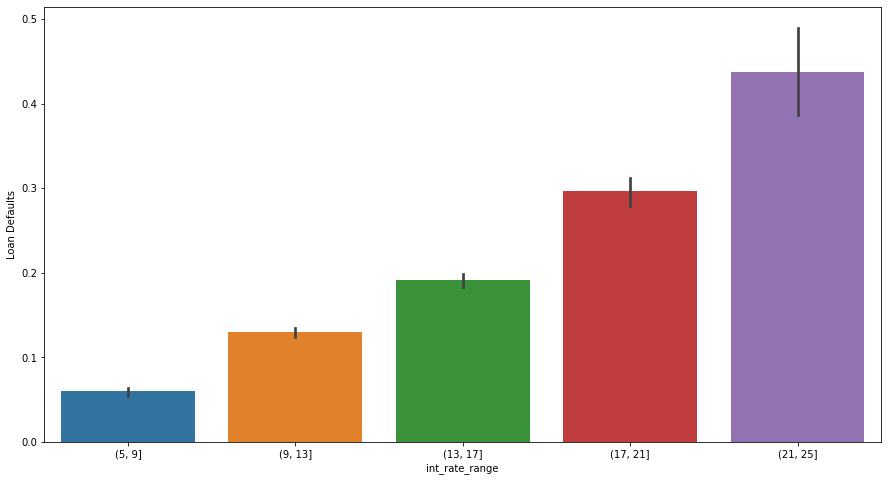

In [323]:
# Plotting the graph between interest rate range and loan defaults
plot_data('int_rate_range','loan_status')

#### Observation 6:
#### This suggests that there is more percentage of defaults with increase in the number of interest rate

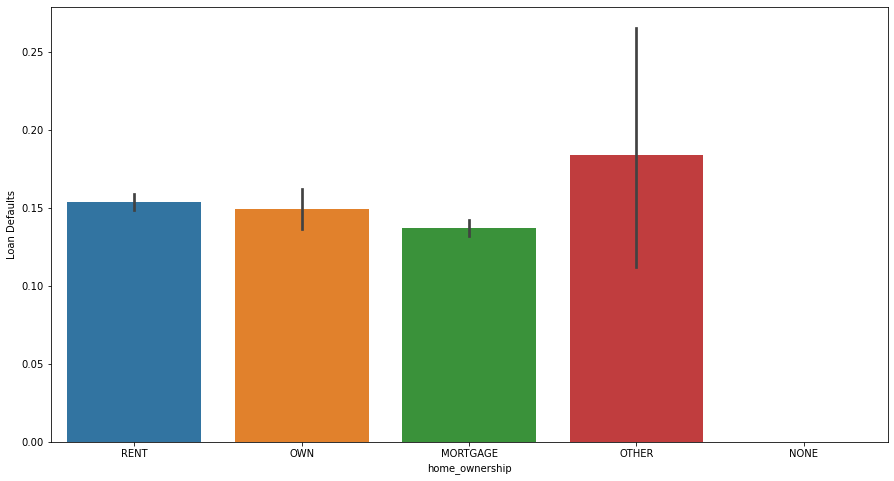

In [324]:
# Plotting the graph against home ownership
plot_data('home_ownership','loan_status')

### Observation 7:
#### This suggests that the people having not specified the home ownserhip had more defaults in the loans

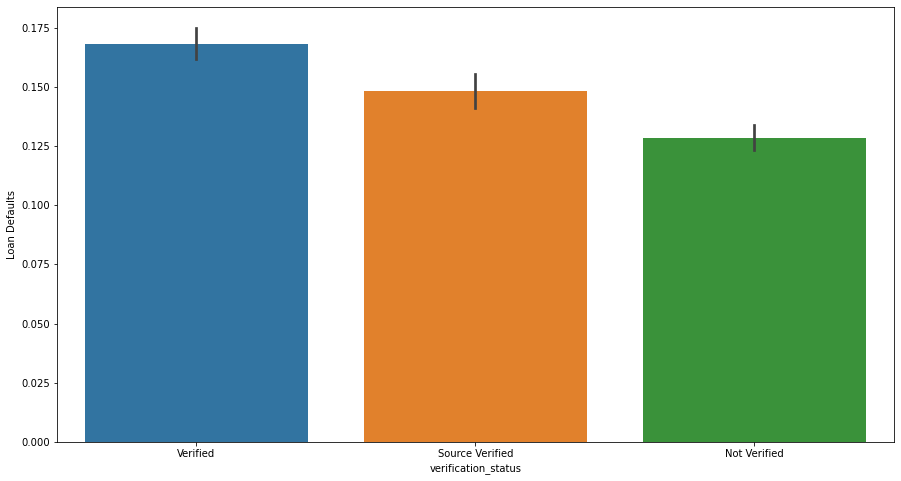

In [325]:
# Plotting the graph between verification status and loan status
plot_data('verification_status','loan_status')

### Observation 8:
#### This suggests that there defaults among the people whose income source is verified

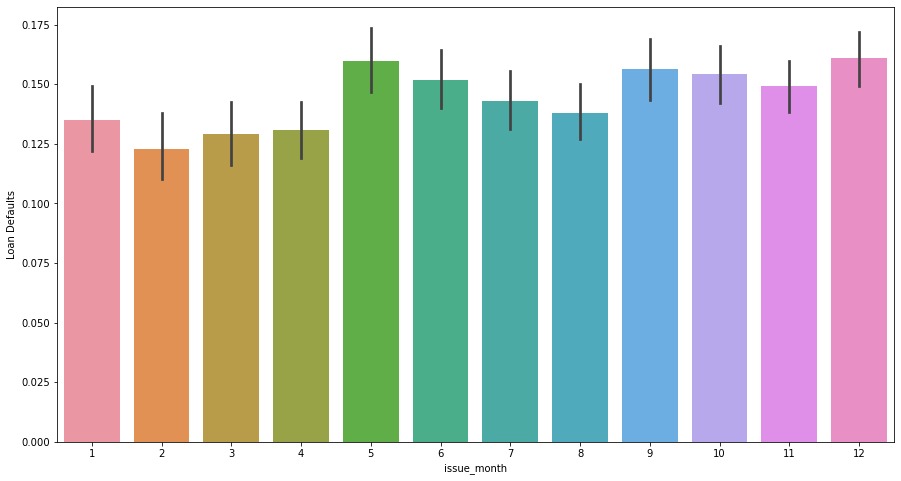

In [352]:
# Plotting the graph between Issue month and loan status
plot_data('issue_month','loan_status')

#### No. of defaults has no corelation with issue month

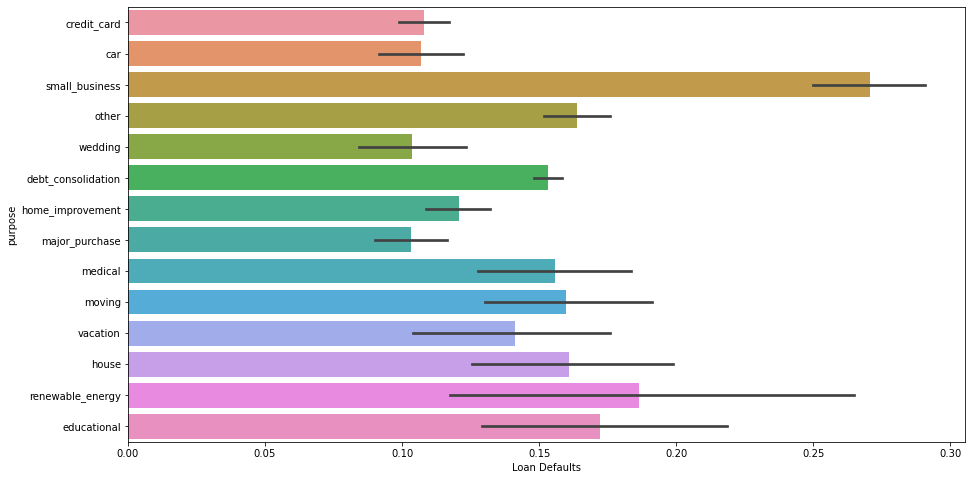

In [327]:
# Plotting the graph between Purpose and loan status
plt.figure(figsize=(15, 8))
plot=sns.barplot(x='loan_status', y='purpose', data=df_loans)
plot.set(xlabel='Loan Defaults')
plt.show()

### Observation 9:
#### This suggsts that people having purpose as small business are doing more number of defaults

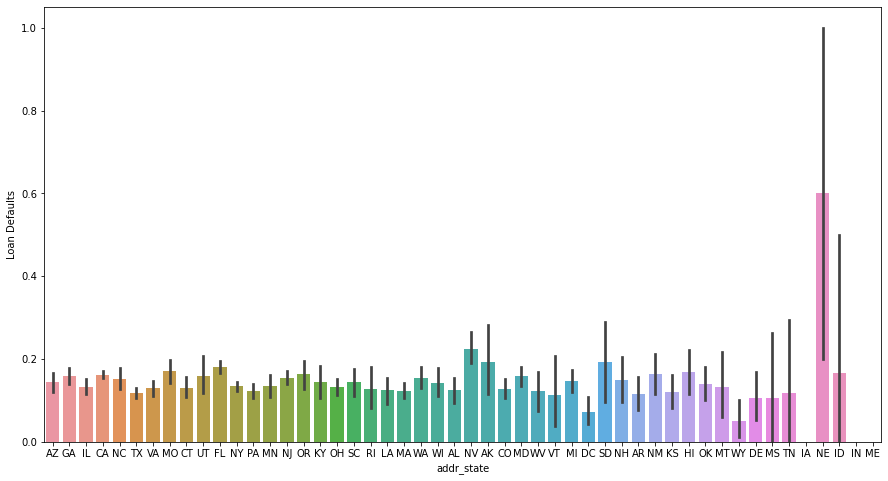

In [328]:
# Plotting the graph between State and loan status
plot_data('addr_state','loan_status')

In [329]:
# Checking the number of defaults across different state
data=df_loans.groupby('addr_state')['loan_status'].mean()*100
data.sort_values()

addr_state
ME     0.000000
IN     0.000000
IA     0.000000
WY     5.000000
DC     7.109005
MS    10.526316
DE    10.619469
VT    11.320755
AR    11.489362
TN    11.764706
TX    11.884167
KS    12.156863
WV    12.209302
MA    12.259059
PA    12.261580
LA    12.412178
AL    12.413793
CO    12.793734
RI    12.886598
VA    12.929145
CT    12.947658
OH    13.157895
MT    13.253012
IL    13.328823
NY    13.385614
MN    13.388430
OK    13.937282
WI    14.318182
SC    14.379085
KY    14.469453
AZ    14.487633
MI    14.630682
NH    15.060241
NC    15.200000
WA    15.525672
NJ    15.530726
GA    15.820456
MD    15.835777
UT    15.873016
CA    16.189380
OR    16.321839
NM    16.393443
ID    16.666667
HI    16.867470
MO    17.014925
FL    18.122977
AK    19.230769
SD    19.354839
NV    22.546973
NE    60.000000
Name: loan_status, dtype: float64

### Observation 10:
#### This suggests that loan applications from NE state have more probability of defaulting, while applications from ME,IN and IA are safe to disburse loans 

In [330]:
data=df_loans.groupby('zip_code')['loan_status'].mean()*100
data.sort_values(ascending=False)

zip_code
999    100.000000
669    100.000000
833    100.000000
94     100.000000
373    100.000000
663    100.000000
385    100.000000
689    100.000000
561     71.428571
746     71.428571
685     66.666667
897     50.000000
413     50.000000
416     50.000000
496     50.000000
673     50.000000
607     50.000000
798     50.000000
203     50.000000
608     50.000000
744     45.454545
719     45.454545
808     45.454545
215     42.857143
573     40.000000
499     40.000000
438     40.000000
755     40.000000
611     38.461538
253     36.363636
924     35.000000
912     34.042553
807     33.333333
376     33.333333
406     33.333333
409     33.333333
758     33.333333
425     33.333333
859     33.333333
316     33.333333
599     33.333333
883     33.333333
264     33.333333
668     33.333333
766     33.333333
724     33.333333
713     33.333333
35      33.333333
638     33.333333
639     33.333333
935     33.000000
75      31.818182
534     31.250000
187     30.769231
177     30.769231
5

### Observation 11:
#### This suggests that the zip codes with values as 999,669,833,094,373,663,385,689 has 100% default probability, while 561,746,685 have more than 50% default rate.

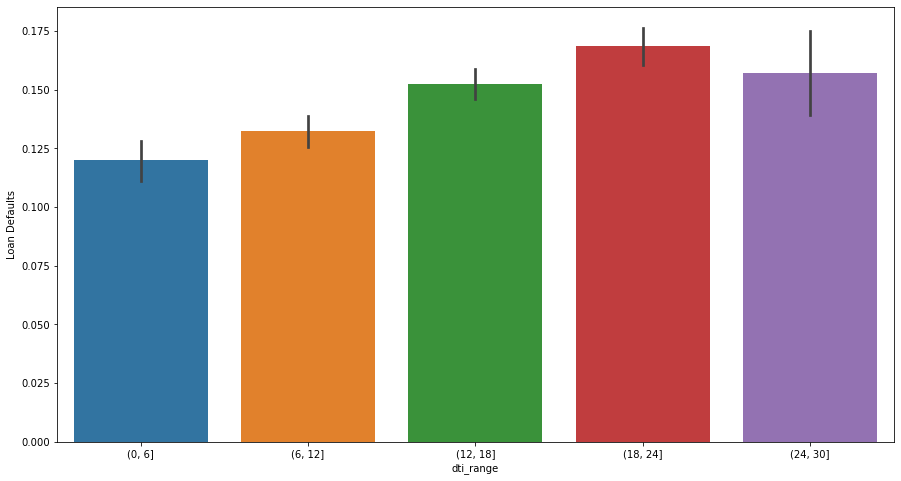

In [256]:
# Analysis of loan defaults across the debt to income ratio

bins = [0,6,12,18,24,30]
labels = [f'{i}+' if j==np.inf else f'{i}-{j}' for i, j in zip(bins, bins[1:])]
df_loans['dti_range'] = pd.cut(df_loans['dti'], bins, labels)
plot_data('dti_range','loan_status')

### Observation 12:
#### There are more number of defaults where the dti range is between 18 to 24

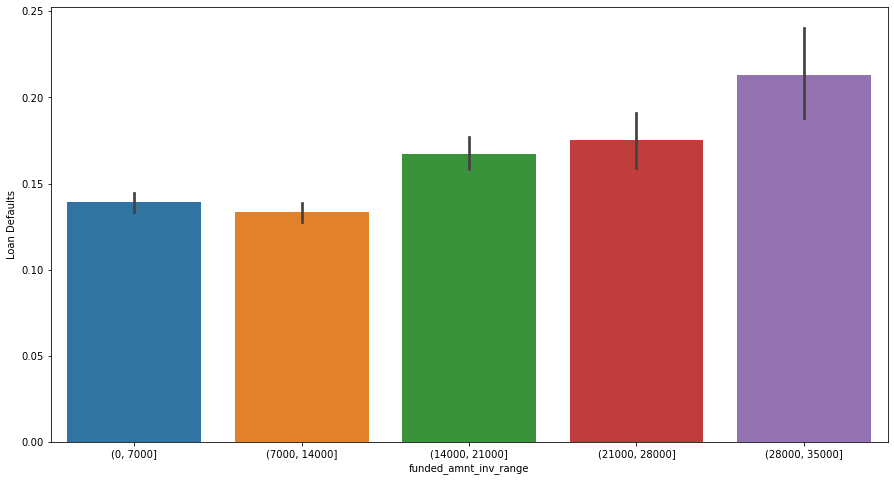

In [260]:
# Checking the loan defaulters across different funded_amnt_inv
bins = [0, 7000, 14000, 21000, 28000,35000]
labels = [f'{i}+' if j==np.inf else f'{i}-{j}' for i, j in zip(bins, bins[1:])]

df_loans['funded_amnt_inv_range'] = pd.cut(df_loans['funded_amnt_inv'], bins, labels)
plot_data('funded_amnt_inv_range','loan_status')

### Observation 13:
#### This suggests that there are more number of defaults where the funded amount is between 28000 to 35000

In [271]:
# Checking the distribution ranges of the annual income
df_loans.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [376]:
# Since there is distribution in the annual income category with some outliers, definiing categories for annual income
# on the basis on quantile values

first_quantile = df_loans.annual_inc.quantile(0.25)
second_quantile = df_loans.annual_inc.quantile(0.50)
third_quantile = df_loans.annual_inc.quantile(0.75)
def get_annual_income_category(amount):
    if amount <= first_quantile:
        return 'Very Low(<=40K)'
    if (amount > first_quantile) & (amount <= second_quantile):
        return 'Low(>40K & <=58.86K)'
    elif (amount > second_quantile) & (amount <= third_quantile):
        return 'Medium(>58.86K & <=82K)'
    else:
        return 'High(>82K)'
    
df_loans['annual_income_type']=df_loans.annual_inc.apply(lambda value:get_annual_income_category(value))
df_loans.head(2)

loan_amnt  funded_amnt  funded_amnt_inv  term_in_months  int_rate_percent  \
0       5000         5000           4975.0              36             10.65   
1       2500         2500           2500.0              60             15.27   

   installment grade sub_grade  emp_length home_ownership  ...  addr_state  \
0       162.87     B        B2        10.0           RENT  ...          AZ   
1        59.83     C        C4         0.0           RENT  ...          GA   

     dti zip_code_group  loan_range int_rate_range  issue_month issue_year  \
0  27.65        801-900   (0, 5000]        (9, 13]           12       2011   
1   1.00        301-400   (0, 5000]       (13, 17]           12       2011   

   zip_code_range  loan_category annual_income_type  
0         801-900  Small(<=5000)    Very Low(<=40K)  
1         301-400  Small(<=5000)    Very Low(<=40K)  

[2 rows x 26 columns]

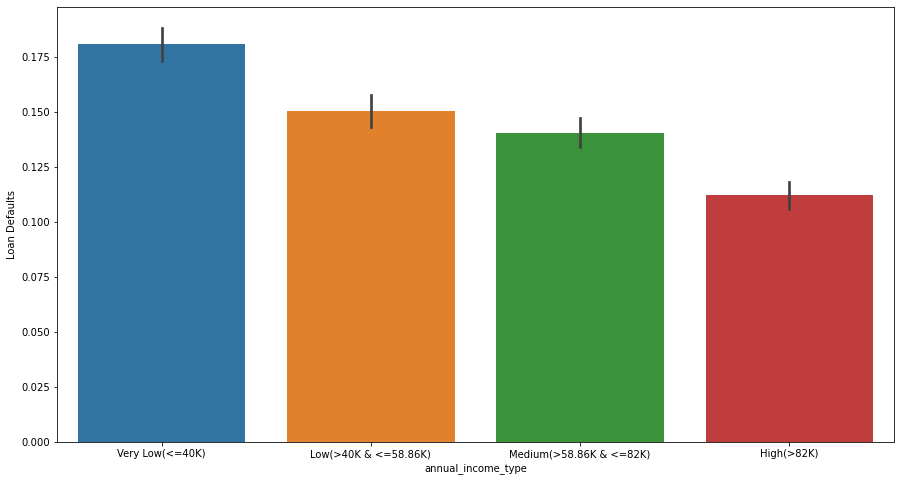

In [274]:
# Plotting the relationship between loan status and annual income type
plot_data('annual_income_type','loan_status')

### Observation 14:
#### Above suggests that there are more loan defaults in the very low income group, i,e the income less than 40k

## Bivariate Analysis

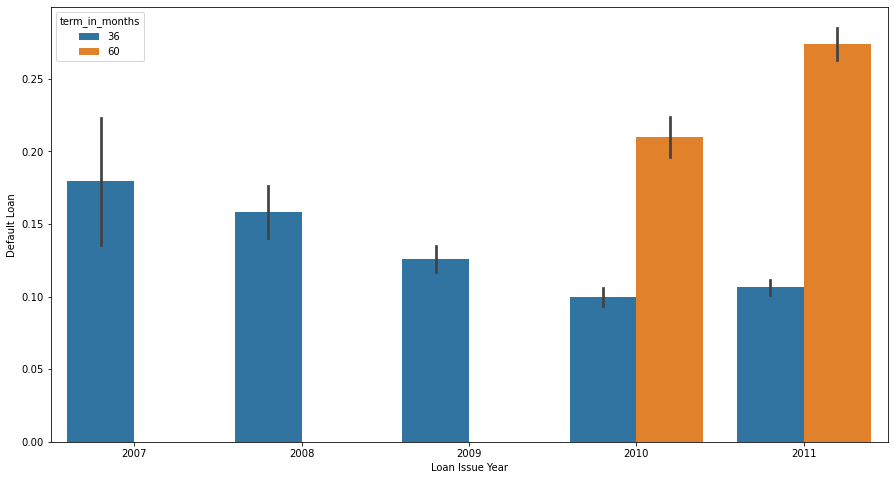

In [346]:
# Bivariate Analysis of the loan defaults with respect to term of loan and issue year
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="issue_year", y = "loan_status" , hue="term_in_months", data = df_loans)
ax.set(xlabel='Loan Issue Year', ylabel='Default Loan')
plt.show()

### Observation 15:
#### This suggests that loan default rate decreased for the term od 36 months from year 2007 to 2010, while with introduction of 60 months loan term, the loan defaults got increased, as we have already seen in univariate analysis

In [347]:
# Checking the number of defaults across different states and zip codes, this drills down to the zip codes 
# within states having more defaults
new_loans=df_loans[['addr_state','zip_code','loan_status']]
new_loans.groupby(['addr_state','zip_code'])['loan_status'].mean()*100

addr_state  zip_code
AK          352         100.000000
            363           0.000000
            995          15.151515
            996          16.666667
            997          30.000000
            998           0.000000
            999         100.000000
AL          350           8.928571
            351           9.375000
            352           8.620690
            353           0.000000
            354          25.000000
            355          10.000000
            356           3.225806
            357           4.000000
            358          18.750000
            359          13.333333
            360          21.739130
            361          23.809524
            362          10.000000
            363          23.809524
            364          20.000000
            365          15.384615
            366           8.571429
            367          25.000000
            368          12.000000
            369           0.000000
AR          711         100.000000

In [355]:
# Getting the data for the state and zip code, where the loan defaults are greater than 50%
state_loans=df_loans[['addr_state','zip_code','loan_status']]
grpd_state_loans=new_loans.groupby(['addr_state','zip_code'])['loan_status'].mean().reset_index()
grpd_state_loans=grpd_state_loans[grpd_state_loans['loan_status']>0.5]
grpd_state_loans.head()

addr_state  zip_code  loan_status
0           AK       352          1.0
6           AK       999          1.0
27          AR       711          1.0
44          AZ       727          1.0
208         ID       833          1.0

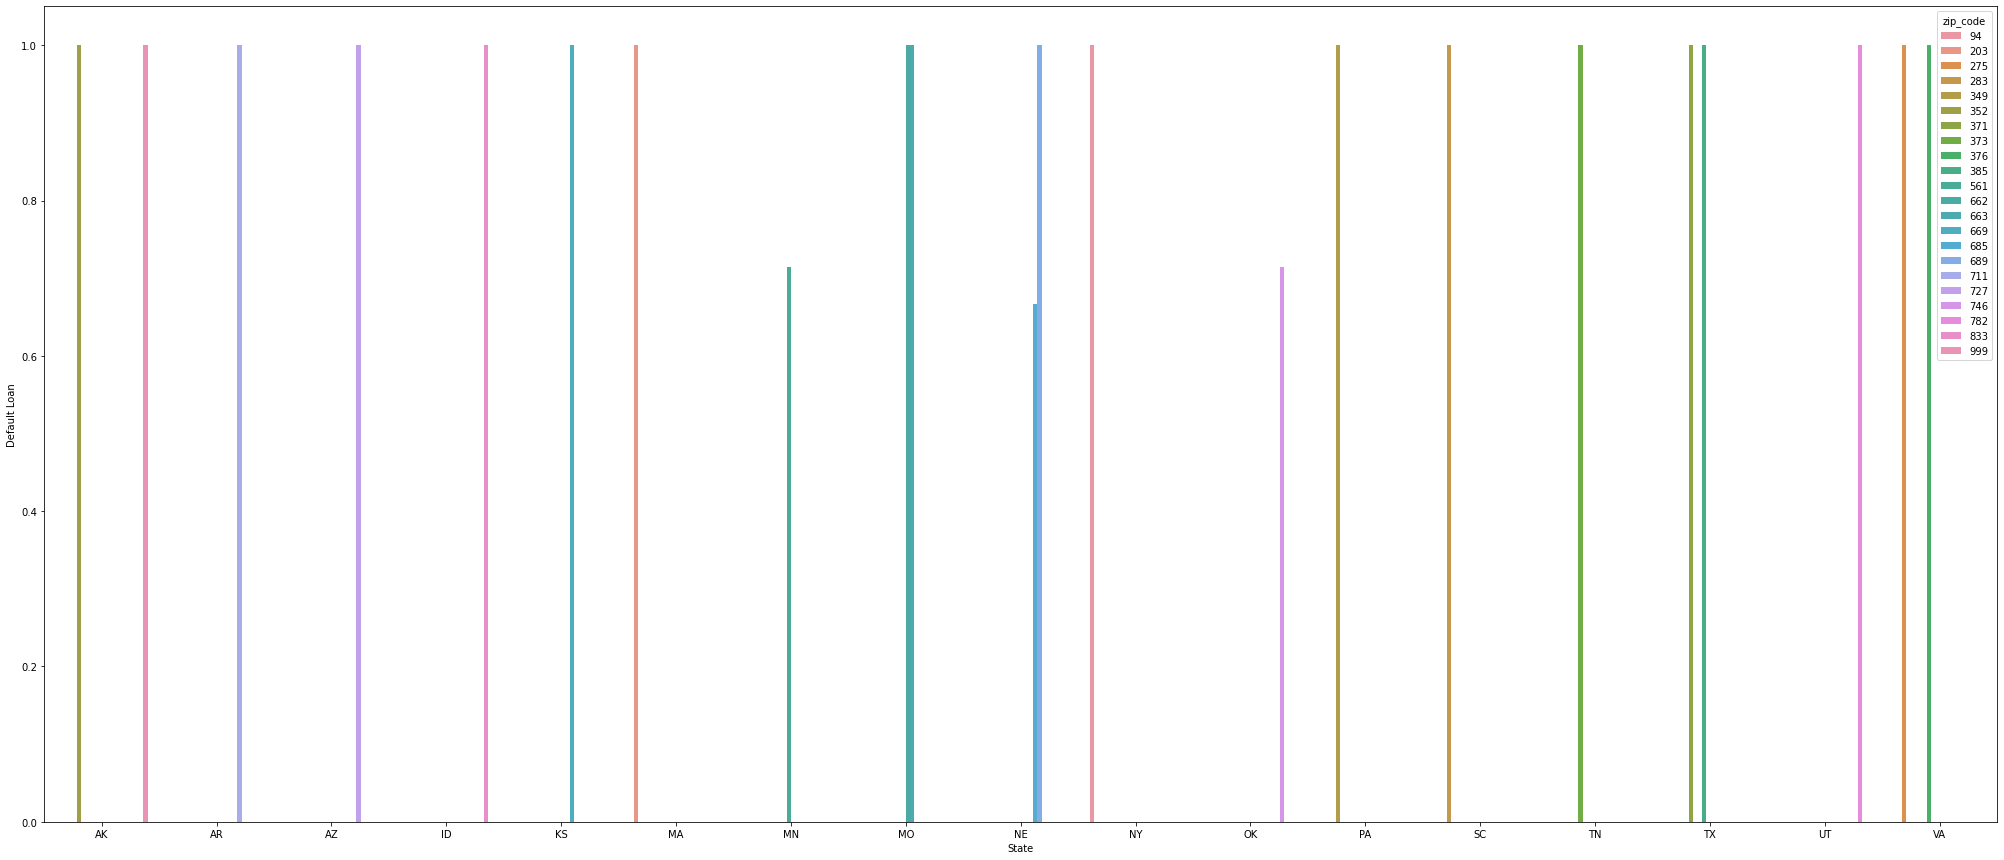

In [362]:
# Plotting the graph for the state and zip code, where the loan defaults are greater than 50% 
plt.figure(figsize=(35, 15))
ax = sns.barplot(x="addr_state", y = "loan_status" , hue="zip_code", data = grpd_state_loans)
ax.set(xlabel='State', ylabel='Default Loan')
plt.show()

loan_amnt  funded_amnt  funded_amnt_inv  term_in_months  \
loan_amnt          1.000000     0.981790         0.937922        0.346650   
funded_amnt        0.981790     1.000000         0.956172        0.324893   
funded_amnt_inv    0.937922     0.956172         1.000000        0.343922   
term_in_months     0.346650     0.324893         0.343922        1.000000   
int_rate_percent   0.301265     0.304930         0.297473        0.440206   
installment        0.932260     0.958035         0.905464        0.090456   
emp_length         0.146840     0.146620         0.157867        0.103249   
annual_inc         0.268999     0.264798         0.251981        0.043866   
loan_status        0.059463     0.056497         0.037781        0.173487   
zip_code          -0.000281    -0.000465        -0.000127       -0.010599   
dti                0.062436     0.062194         0.070663        0.076182   
issue_month        0.051902     0.041853         0.068091        0.033173   
issue_year         0.109814     0.120844         0.252332        0.237704   

                  int_rate_percent  installment  emp_length  annual_inc  \
loan_amnt                 0.301265     0.932260    0.146840    0.268999   
funded_amnt               0.304930     0.958035    0.146620    0.264798   
funded_amnt_inv           0.297473     0.905464    0.157867    0.251981   
term_in_months            0.440206     0.090456    0.103249    0.043866   
int_rate_percent          1.000000     0.277203    0.000246    0.048899   
installment               0.277203     1.000000    0.120331    0.267842   
emp_length                0.000246     0.120331    1.000000    0.109956   
annual_inc                0.048899     0.267842    0.109956    1.000000   
loan_status               0.211390     0.027153    0.015911   -0.040867   
zip_code                  0.012297     0.004203   -0.008066   -0.004619   
dti                       0.110913     0.052038    0.049469   -0.121530   
issue_month               0.025285     0.029439    0.021355    0.008980   
issue_year                0.039417     0.053066    0.118065    0.008558   

                  loan_status  zip_code       dti  issue_month  issue_year  
loan_amnt            0.059463 -0.000281  0.062436     0.051902    0.109814  
funded_amnt          0.056497 -0.000465  0.062194     0.041853    0.120844  
funded_amnt_inv      0.037781 -0.000127  0.070663     0.068091    0.252332  
term_in_months       0.173487 -0.010599  0.076182     0.033173    0.237704  
int_rate_percent     0.211390  0.012297  0.110913     0.025285    0.039417  
installment          0.027153  0.004203  0.052038     0.029439    0.053066  
emp_length           0.015911 -0.008066  0.049469     0.021355    0.118065  
annual_inc          -0.040867 -0.004619 -0.121530     0.008980    0.008558  
loan_status          1.000000  0.017514  0.045078     0.024762    0.024451  
zip_code             0.017514  1.000000  0.017947     0.006113    0.013045  
dti                  0.045078  0.017947  1.000000     0.014197    0.092857  
issue_month          0.024762  0.006113  0.014197     1.000000   -0.035536  
issue_year           0.024451  0.013045  0.092857    -0.035536    1.000000

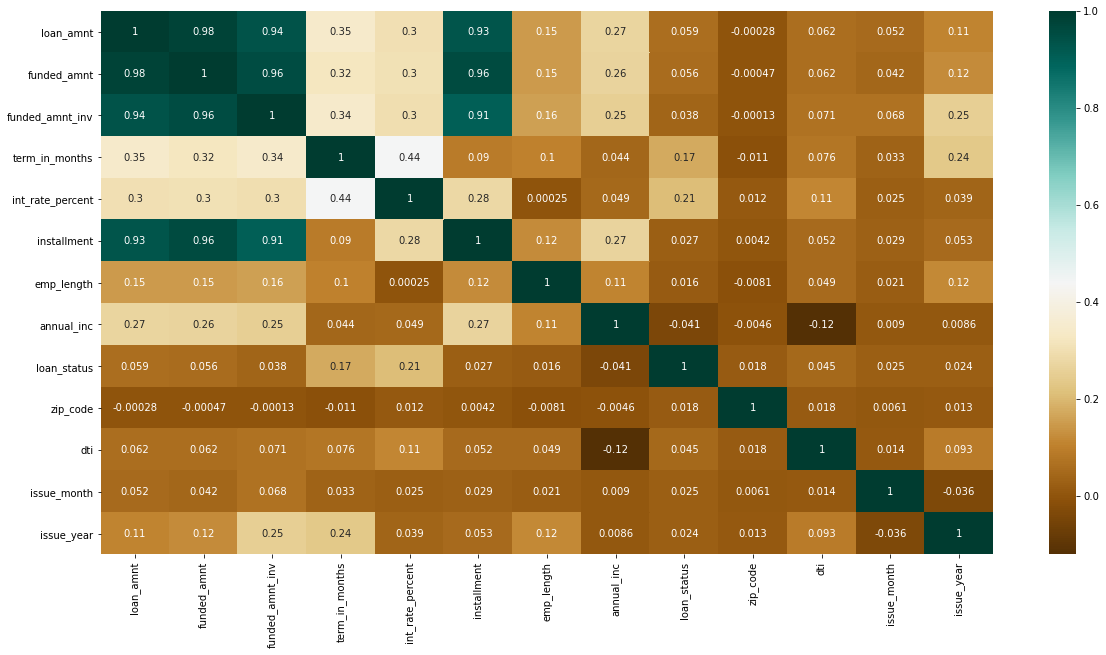

In [365]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
corr= df_loans.corr()
sns.heatmap(corr,cmap='BrBG',annot=True)
corr

### Observation 15:
#### There is a positive correlation of loan status with the term and interest rate (as compared to other variables) and the same was also observed during univariate analysis

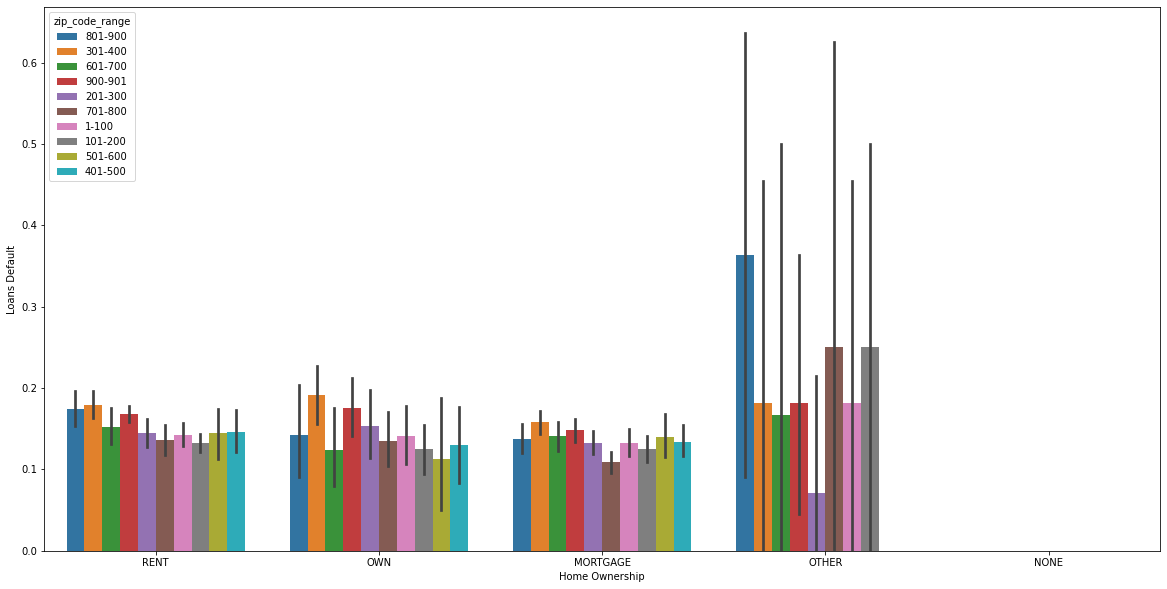

In [370]:
# Analysis of the home_ownership and zip code range for the number of loan defaults
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="home_ownership", y = "loan_status" , hue="zip_code_range", data = df_loans)
ax.set(xlabel='Home Ownership', ylabel='Loans Default')
plt.show()

### Observation 16: 
#### This analysis suggests that in the home ownership 'Other' category, the maximum number of defaults are for the zip code range between 801-900

In [372]:
# Defining the category for each loan amoount, so that we can analyse this with the term
firstq = df_loans['funded_amnt_inv'].quantile(0.25)
secondq = df_loans['funded_amnt_inv'].quantile(0.50)
thirdq = df_loans['funded_amnt_inv'].quantile(0.75)

def get_loan_category(loan_amnt):
    if loan_amnt <= firstq:
        return 'Small(<=5000)'
    if (loan_amnt > firstq) & (loan_amnt <= secondq):
        return 'Medium(>5000 & <=8733)'
    elif (loan_amnt > secondq) & (loan_amnt <= thirdq):
        return 'Large(>8733 & <=14000)'
    else:
        return 'Very Large(>14000)'

df_loans['loan_category'] = df_loans[['funded_amnt_inv']].applymap(lambda value : get_loan_category(value))
df_loans['loan_category'].value_counts()

Small(<=5000)             10701
Large(>8733 & <=14000)     9695
Very Large(>14000)         9593
Medium(>5000 & <=8733)     8588
Name: loan_category, dtype: int64

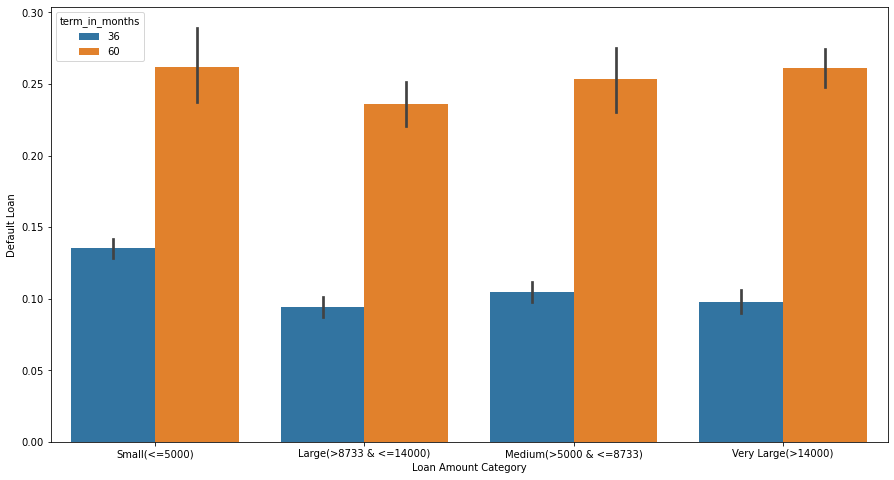

In [373]:
# Plotting the graph with loan category, term and default loan %
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="loan_category", y = "loan_status" , hue="term_in_months", data = df_loans)
ax.set(xlabel='Loan Amount Category', ylabel='Default Loan')
plt.show()

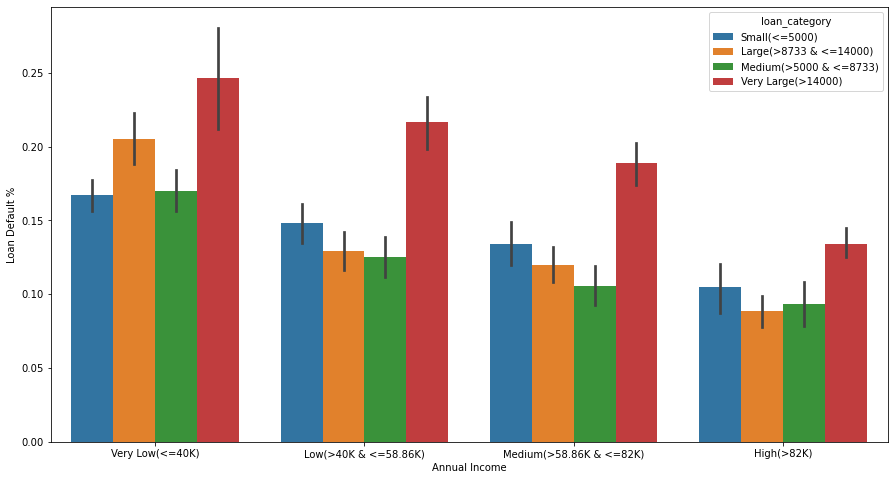

In [378]:
# Plotting the graph with loan category, Annual Income and default loan %
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="annual_income_type", y = "loan_status" , hue="loan_category", data = df_loans)
ax.set(xlabel='Annual Income', ylabel='Loan Default %')
plt.show()